In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("Iris.csv")

# Check Missing Vlaues

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Visualize Distribution

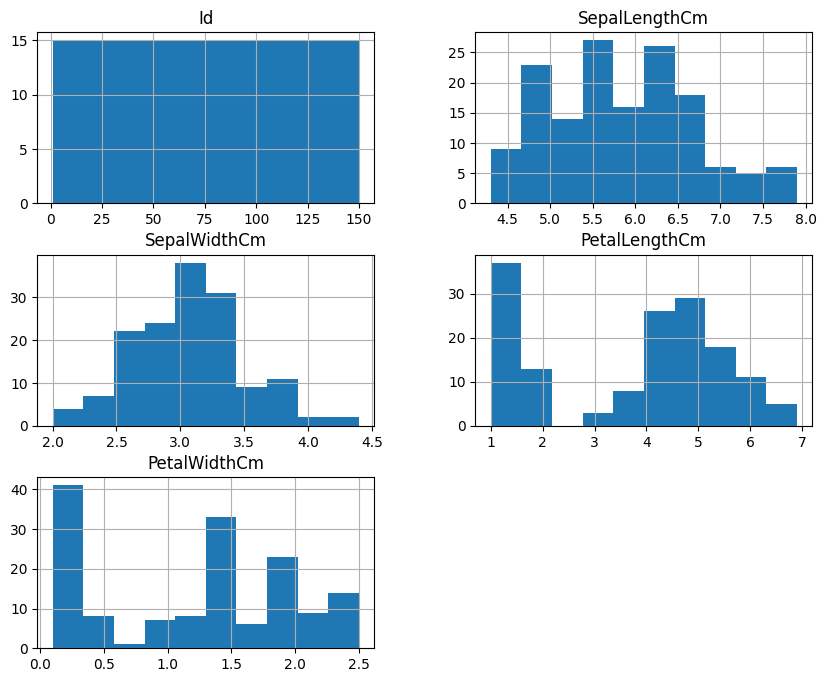

In [8]:
df.hist(figsize=(10,8))
plt.show()

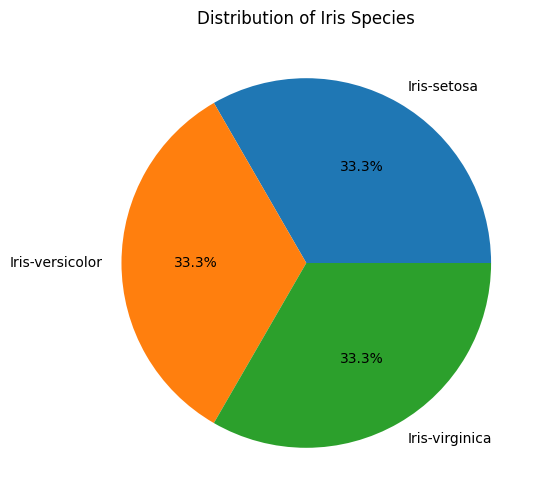

In [12]:
species_count=df["Species"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(species_count,labels=species_count.index,autopct='%1.1f%%')
plt.title("Distribution of Iris Species")
plt.show()

# Encode Categorical Labels

In [14]:
le=LabelEncoder()
df["Species_label"]=le.fit_transform(df["Species"])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [16]:
#by using mapping
mapping={"Iris-setosa":1,"Iris-viginica":0,"Iris-versicolor":2}
df["season_mapping_label"]=df["Species"].map(mapping)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_label,season_mapping_label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,1.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,1.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,1.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,1.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,1.0


# Scale Features to normalize ranges

In [24]:
from sklearn.preprocessing import StandardScaler
# Drop Id column (not useful for ML)
iris = df.drop("Id", axis=1)

# Separate features (X) and target (y)
X = df.drop("Species", axis=1)   # numeric columns
y = df["Species"]                # target (species)

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easy view
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Before scaling:\n", X.head())
print("\nAfter scaling:\n", X_scaled.head())



Before scaling:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0   1            5.1           3.5            1.4           0.2   
1   2            4.9           3.0            1.4           0.2   
2   3            4.7           3.2            1.3           0.2   
3   4            4.6           3.1            1.5           0.2   
4   5            5.0           3.6            1.4           0.2   

   Species_label  season_mapping_label  
0              0                   1.0  
1              0                   1.0  
2              0                   1.0  
3              0                   1.0  
4              0                   1.0  

After scaling:
          Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0 -1.720542      -0.900681      1.032057      -1.341272     -1.312977   
1 -1.697448      -1.143017     -0.124958      -1.341272     -1.312977   
2 -1.674353      -1.385353      0.337848      -1.398138     -1.312977   
3 -1.651258      -1.50652

# Create a Corelation Heatmap

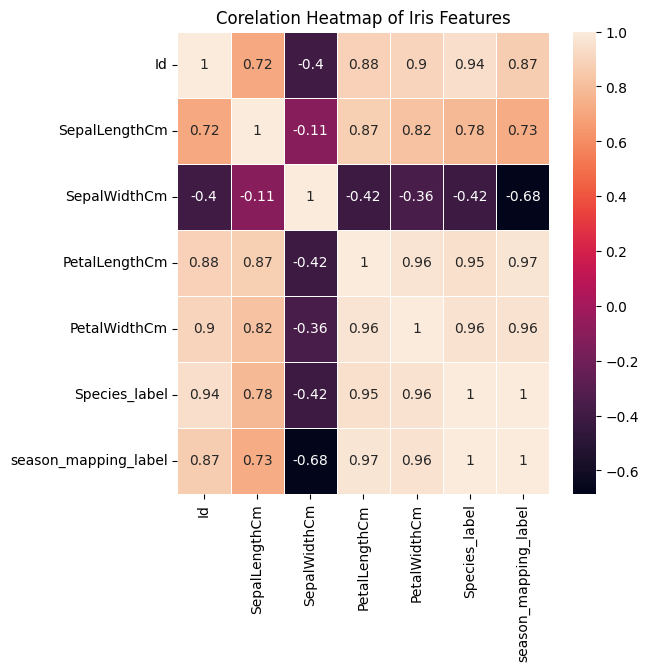

In [28]:
df_corr=df.drop("Species",axis=1).corr()
figure=plt.figure(figsize=(6,6))
sns.heatmap(df_corr,annot=True,linewidths=0.5)
plt.title("Corelation Heatmap of Iris Features")
plt.show()

# Discuss feature Corelation

Correlation tells us how strongly two features are related to each other.

-> +1(strong positive correlation):if one increases,the other also increases

-> -1(strong negative correlation):if one inc the other decreases

-> 0(no correlation):no clear relation

# Insights 

petal length & petal width are highly correlated they give the most useful info for predicting the the species 
sepel features are less correlated not as strong predictors for dpecies classification.
